# Programming for Analytics – Final Project

## FIFA 24 Player Stats Dataset 

Author: **Robert Parkes**

I got this dataset from Kaggle (“FIFA 24 Player Stats Dataset”). The dataset has over 5,600 rows (players) and more than 40 columns covering different performance attributes.

The aim of this assignment was to analyse the dataset using Python and explore the various player performance attributes to try and predict a player’s finishing ability, as well as identify any other correlations that might be linked to a player’s skills or value.

There were many steps involved in this assignment, as it was a full, complete data analysis workflow. This included: loading and inspecting the dataset, cleaning and standardising the data, grouping and aggregating statistics, performing a correlation analysis, creating visualisations, and finally drawing conclusions and reflecting on limitations.

## 1. Introduction and Dataset Overview

The overall main question I was asking in this assignment with the FIFA 24 Player Stats dataset was: **“Which technical or physical attributes have a stronger correlation with a player’s finishing ability?”**

The dataset I sourced was perfect for this assignment, as it contained a large number of rows and mostly numeric, standardised performance attributes. This is ideal for descriptive statistics, correlation analysis, and simple modelling. It made the most sense to use finishing as the key variable in the assignment because it is a core measure of attacking quality in football and is strongly linked to scoring ability.

The first step of the assignment was to load the dataset and gather basic information about it using `.head()`, `.info()`, `.shape`, and `.describe()`.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

data_path = Path("player_stats.csv")
df = pd.read_csv(data_path, encoding="latin-1")

print(df.head())

                     player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0            55         43      NaN            68  ...     32      34   
1            69         70      NaN            56  ...     65      62   
2            25         12      NaN            13  ...     20      15   
3            46         48      NaN            66  ...     25      13   
4            14          8      NaN            14  ...      9      10   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0         41   

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [3]:
print(df.shape)

(5682, 41)


In [4]:
print(df.describe())

            height       weight          age  ball_control    dribbling  \
count  5682.000000  5682.000000  5682.000000   5682.000000  5682.000000   
mean    181.670539    75.282295    26.316262     58.912179    56.128476   
std       6.829238     6.998971     4.729967     16.567068    18.772075   
min     156.000000    54.000000    17.000000      8.000000     5.000000   
25%     177.000000    70.000000    23.000000     55.000000    51.000000   
50%     182.000000    75.000000    26.000000     63.000000    62.000000   
75%     186.000000    80.000000    30.000000     69.000000    68.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       marking  slide_tackle  stand_tackle   aggression    reactions  ...  \
count      0.0   5682.000000   5682.000000  5682.000000  5682.000000  ...   
mean       NaN     46.728441     48.820838    56.324006    61.959345  ...   
std        NaN     20.519430     20.975966    16.846410     8.893309  ...   
min        NaN  

## 2. Data Cleaning and Preparation

This section of the assignment focused on cleaning and preparing the dataset for analysis. To do this, I completed the following steps:

- Checked for missing values
- Dropped the empty column `marking` 
- Cleaned the `value` field by removing symbols and converting it to numeric
- Standardised the text fields (player, club, country)
- Removed any duplicate rows
- Removed goalkeepers
- Renamed columns for clarity

In [5]:
print(df.isna().sum())

player               0
country              0
height               0
weight               0
age                  0
club                 0
ball_control         0
dribbling            0
marking           5682
slide_tackle         0
stand_tackle         0
aggression           0
reactions            0
att_position         0
interceptions        0
vision               0
composure            0
crossing             0
short_pass           0
long_pass            0
acceleration         0
stamina              0
strength             0
balance              0
sprint_speed         0
agility              0
jumping              0
heading              0
shot_power           0
finishing            0
long_shots           0
curve                0
fk_acc               0
penalties            0
volleys              0
gk_positioning       0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_reflexes          0
value                0
dtype: int64


In [6]:
# Need to make a cleaned version of this dataset
df_cleaned = df.copy()

# Then I needed to remove the empty ‘marking’ column
df_cleaned.drop(columns=['marking'], inplace=True)

# Check the shape again after changes
print(df_cleaned.shape)

(5682, 40)


In [7]:
# Cleaning the 'value' column

df_cleaned['value'] = (
    df_cleaned['value']
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .astype(float)
)

print(df_cleaned['value'].head())

0    1400000.0
1      97500.0
2    1100000.0
3      65000.0
4      30000.0
Name: value, dtype: float64


In [8]:
# Standardised the text fields: player, country, and club

df_cleaned['player'] = (
    df_cleaned['player']
    .str.lower()
    .str.strip()
)

df_cleaned['country'] = (
    df_cleaned['country']
    .str.lower()
    .str.strip()
)

df_cleaned['club'] = (
    df_cleaned['club']
    .str.lower()
    .str.strip()
)

print(df_cleaned[['player', 'country', 'club']].head())

                     player   country           club
0  cristian castro devenish  colombia  atl. nacional
1          silaldo taffarel    brazil    corinthians
2             thomas dã¤hne   germany  holstein kiel
3         michael sollbauer   austria  sk rapid wien
4             diego segovia   uruguay  independiente


In [9]:
# Checked to see if there were duplicate rows
duplicates = df_cleaned.duplicated().sum()
print("Number of duplicate rows found:", duplicates)

# Remove duplicates if any found
df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)

print("Shape after removing duplicates:", df_cleaned.shape)

Number of duplicate rows found: 3
Shape after removing duplicates: (5679, 40)


In [10]:
# Subset: removed goalkeepers

df_cleaned = (
    df_cleaned[df_cleaned['gk_diving'] < 40]
    .reset_index(drop=True)
)

print("Shape after removing goalkeepers:", df_cleaned.shape)

Shape after removing goalkeepers: (5047, 40)


- I thought it made sense to remove goalkeepers, as their main attributes (such as diving, handling, and reflexes) are completely different from outfield players.
- Including them would have affected statistics like the mean and could have had a major impact on the analysis, so it didn’t make sense to keep them.
- The dataset I sourced was quite clean, however, if it hadn’t been, I could have used other cleaning methods such as imputing missing values, restricting to real club names, or resolving more complex encoding issues.

In [11]:
df_cleaned = df_cleaned.rename(columns={
    'stand_tackle': 'standing_tackle',
    'slide_tackle': 'sliding_tackle',
    'fk_acc': 'free_kick_accuracy'
})

## 3. Data Exploration and Analysis

In this part of the assignment, I summarised key statistics, examined grouped patterns, explored attribute relationships, and identified meaningful insights from the dataset.

### 3.1 Descriptive Statistics

To understand the key player traits, I generated numerical summaries to get an overview of attributes such as age, shooting ratings, physical ratings, and market value.

In [12]:
print("Summary Statistics for Key Numeric Columns:")
print(
    df_cleaned.describe()
)

print(
    "\nAverage player age:",
    df_cleaned['age'].mean()
)

print(
    "Median overall finishing:",
    df_cleaned['finishing'].median()
)

print(
    "Max value of any player:",
    df_cleaned['value'].max()
)

Summary Statistics for Key Numeric Columns:
            height       weight          age  ball_control    dribbling  \
count  5047.000000  5047.000000  5047.000000   5047.000000  5047.000000   
mean    180.773529    74.471567    26.227264     63.810779    61.476719   
std       6.531186     6.701430     4.643628      9.267080    11.602402   
min     156.000000    54.000000    17.000000     25.000000    20.000000   
25%     176.000000    70.000000    23.000000     58.000000    56.000000   
50%     181.000000    74.000000    26.000000     64.000000    63.000000   
75%     185.000000    79.000000    30.000000     70.000000    69.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       sliding_tackle  standing_tackle   aggression    reactions  \
count     5047.000000      5047.000000  5047.000000  5047.000000   
mean        50.829404        53.177135    60.143452    62.428175   
std         17.874691        17.926025    13.448395     8.527144   
min     

### 3.2 Grouping & Aggregation

Using group operations, I calculated some average statistics so we could start to see patterns across different countries and clubs. These included:
- Average player age by country
- Average finishing rating by club
- Average attacking positioning rating by country

In [13]:
# Average age by country
avg_age_by_country = (
    df_cleaned
    .groupby('country')['age']
    .mean()
    .sort_values(ascending=False)
)
print("Average age by country:")
print(avg_age_by_country.head(10))

Average age by country:
country
seychelles           35.00
trinidad & tobago    33.00
korea dpr            33.00
st kitts nevis       32.50
suriname             32.25
liechtenstein        32.00
puerto rico          32.00
kazakhstan           31.00
russia               31.00
mauritius            31.00
Name: age, dtype: float64


In [14]:
# Average finishing rating by club
avg_finishing_by_club = (
    df_cleaned
    .groupby('club')['finishing']
    .mean()
    .sort_values(ascending=False)
)
print("\nTop 10 clubs by average finishing:")
print(avg_finishing_by_club.head(10))


Top 10 clubs by average finishing:
club
fc bayern münchen    85.000000
morocco              79.000000
real madrid          78.500000
australia            78.000000
hungary              77.000000
manchester city      75.142857
paris sg             73.200000
inter                72.000000
as monaco            71.000000
houston dynamo       70.500000
Name: finishing, dtype: float64


In [15]:
# Average attacking position rating by country
avg_att_position_by_country = (
    df_cleaned
    .groupby('country')['att_position']
    .mean()
    .sort_values(ascending=False)
)
print("\nTop 10 countries by attacking positioning:")
print(avg_att_position_by_country.head(10))


Top 10 countries by attacking positioning:
country
malta                 74.000000
dominican republic    74.000000
armenia               71.000000
korea dpr             69.000000
trinidad & tobago     68.000000
israel                67.666667
suriname              67.250000
cuba                  67.000000
russia                66.500000
liechtenstein         66.000000
Name: att_position, dtype: float64


### 3.3 Correlation Analysis

I created a correlation matrix so we could analyse which technical and physical attributes have the strongest relationships with each other.
I also produced a heatmap to help visualise these correlations, focusing on key attributes such as finishing, dribbling, shot power, speed, balance, and market value.

In [16]:
# Select a subset of important attributes
corr_cols = ['finishing', 'dribbling', 'shot_power', 'long_shots',
             'acceleration', 'sprint_speed', 'balance', 'value']

corr_matrix = df_cleaned[corr_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
              finishing  dribbling  shot_power  long_shots  acceleration  \
finishing      1.000000   0.733585    0.759890    0.845877      0.361502   
dribbling      0.733585   1.000000    0.659510    0.739142      0.515423   
shot_power     0.759890   0.659510    1.000000    0.844425      0.209377   
long_shots     0.845877   0.739142    0.844425    1.000000      0.288643   
acceleration   0.361502   0.515423    0.209377    0.288643      1.000000   
sprint_speed   0.314261   0.446795    0.201620    0.230739      0.864816   
balance        0.344918   0.507167    0.230242    0.351718      0.600665   
value          0.285816   0.366111    0.318507    0.298961      0.175913   

              sprint_speed   balance     value  
finishing         0.314261  0.344918  0.285816  
dribbling         0.446795  0.507167  0.366111  
shot_power        0.201620  0.230242  0.318507  
long_shots        0.230739  0.351718  0.298961  
acceleration      0.864816  0.600665  0.175913  
s

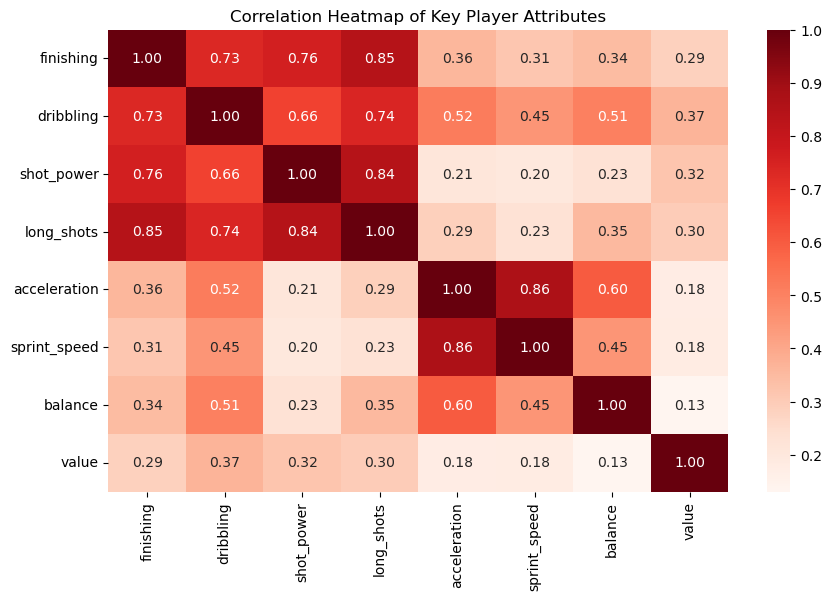

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation Heatmap of Key Player Attributes")
plt.show()

In [18]:
print("\nTop correlations with finishing:")
print(corr_matrix['finishing'].sort_values(ascending=False))


Top correlations with finishing:
finishing       1.000000
long_shots      0.845877
shot_power      0.759890
dribbling       0.733585
acceleration    0.361502
balance         0.344918
sprint_speed    0.314261
value           0.285816
Name: finishing, dtype: float64


## 3.4 Analytical Insights

**Technical shooting attributes have a strong influence on finishing ability (Insight 1):**  
From Section 3 of this assignment, we can see that finishing has a strong correlation with three key attributes: long shots (0.85), shot power (0.76), and dribbling (0.73). This suggests that strong technical shooting skills are the main influences on scoring ability.

**Speed attributes do not have a strong influence on predicting finishing ability (Insight 2):**  
Acceleration (0.36) and sprint speed (0.31) show only weak correlations with finishing. This suggests that being a fast player does not necessarily mean they are a good finisher.

**Multiple attributes contribute to player market value (Insight 3):**  
Market value does not have a strong correlation with any single attribute. The strongest relationships are with dribbling (0.37), shot power (0.32), and long shots (0.30). This suggests that a player’s value depends on being a more complete player overall, rather than being exceptional in just one area. Another point that you can clearly see is that market value has almost no correlation with either acceleration (0.18) or sprint speed (0.18), which suggests that being exceptional in speed attributes does not drive market value.

## 4. Data Visualisation

For this part of the assignment, I created four visualisations:
1. Bar chart — Top 10 clubs by average finishing
2. Histogram — Distribution of players’ ages
3. Scatter plot — Dribbling vs. finishing
4. Boxplot — Finishing ratings

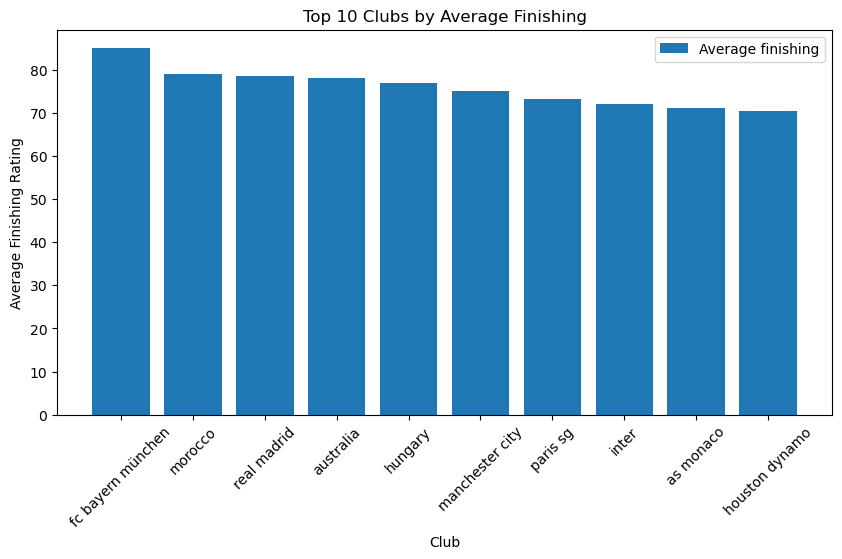

In [19]:
import matplotlib.pyplot as plt

# Bar chart: Top 10 clubs by finishing
top10_clubs = avg_finishing_by_club.head(10)

plt.figure(figsize=(10, 5))
plt.bar(
    top10_clubs.index,
    top10_clubs.values,
    label="Average finishing"
)
plt.title("Top 10 Clubs by Average Finishing")
plt.xlabel("Club")
plt.ylabel("Average Finishing Rating")
plt.xticks(rotation=45)
plt.legend()
plt.show()

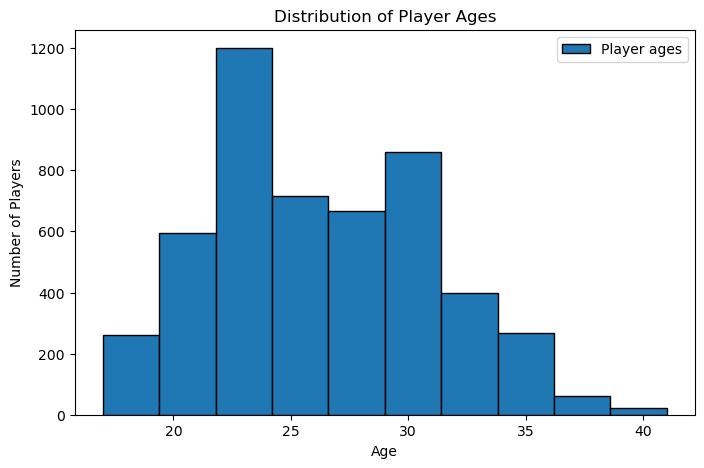

In [20]:
# Histogram: Distribution of Player Ages
plt.figure(figsize=(8, 5))
plt.hist(
    df_cleaned['age'],
    bins=10,
    edgecolor='black',
    label="Player ages"
)
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.legend()
plt.show()

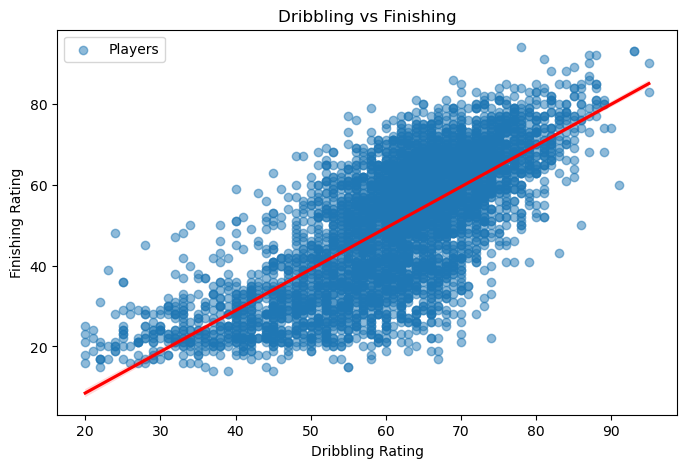

In [21]:
# Scatter Plot: Dribbling vs Finishing
plt.figure(figsize=(8, 5))
plt.scatter(
    df_cleaned['dribbling'],
    df_cleaned['finishing'],
    alpha=0.5,
    label="Players"
)

sns.regplot(
    x='dribbling',
    y='finishing',
    data=df_cleaned,
    scatter=False,
    color='red'
)
plt.title("Dribbling vs Finishing")
plt.xlabel("Dribbling Rating")
plt.ylabel("Finishing Rating")
plt.legend()
plt.show()

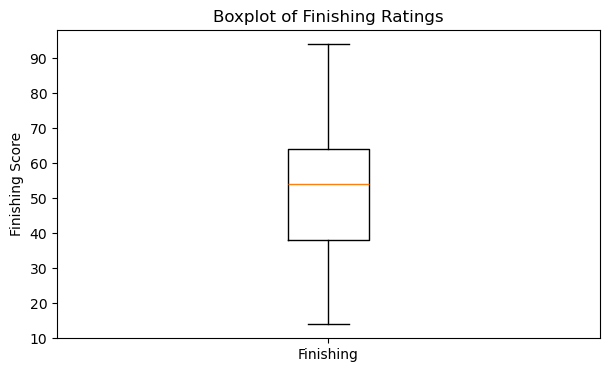

In [22]:
# Boxplot: Boxplot of Finishing Ratings
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(7, 4))
plt.boxplot(df_cleaned['finishing'], labels=["Finishing"])
plt.title("Boxplot of Finishing Ratings")
plt.ylabel("Finishing Score")
plt.show()

## 5. Conclusions and Reflection

### Conclusions
To conclude, from the analysis in this assignment we can see several patterns, such as:

1. **Finishing ability has a strong correlation to technical shooting skills.**  
The strongest correlations with finishing came from long shots, shot power, and dribbling.

3. **Speed contributes far less to finishing than expected.**  
   Both acceleration and sprint speed showed a very weak relationship with finishing.

4. **Market value comes from a combination of offensive skills, not just one.**  
   Value didn’t have a very strong correlation with any single attribute, which suggests that clubs look for players with all-round attacking ability, not just finishing.

### Reflection
In this assignment, I covered the entire data analysis journey, from loading, cleaning, transforming, analysing, and visualising the data.

One error that I came across was that places like “morocco” and “australia” were listed under the club name column. This could be fixed by restricting the analysis to real club names only and not including countries.

The dataset I sourced from Kaggle was already very clean, so there wasn’t much required in terms of data cleaning. However, I do explain how, if the data were messier, additional techniques could be used, such as handling missing values, resolving encoding issues, or merging multiple data sources.

I believe that within this assignment I show how Python and Pandas can be used within the football industry to explore player performance data and carry out an analysis that allows us to gather meaningful insights into player attributes.

A possible next step to build on this analysis would be to create a more complete predictive model or develop a clustering approach.

# 6. Additional Analysis

I have added an extra section to this assignment where I do a bit more analysis. I included three new additions in this section, which are:

1. A new engineered feature: **technical_skill**  
2. A simple NumPy-based regression model predicting market value  
3. A comparison of technical skill across broad positional groups  

These extra additions show some further analysis while still staying within the frame of Python and Pandas.

## 6.1 Feature Engineering — Technical Skill Score

I thought an extra step I could include to showcase how to create new columns/features in the dataset while still being relevant to the analysis, was a new feature called technical_skill.
This feature is created by taking the average of the following attributes:

- dribbling  
- long_shots  
- shot_power  

This creates a simple combined score that represents a player’s overall attacking technique.

In [23]:
# 6.1 Feature Engineering — Technical Skill Score

df_cleaned['technical_skill'] = (
    df_cleaned[['dribbling', 'long_shots', 'shot_power']]
    .mean(axis=1)
)

# Show to confirm new feature
df_cleaned[
    ['player', 'club', 'dribbling',
     'long_shots', 'shot_power', 'technical_skill']
].head()

,player,club,dribbling,long_shots,shot_power,technical_skill
0,cristian castro devenish,atl. nacional,43,31,54,42.666667
1,silaldo taffarel,corinthians,70,68,60,66.000000
2,michael sollbauer,sk rapid wien,48,33,32,37.666667
3,cã©dric zesiger,bsc young boys,43,18,41,34.000000
4,pedro gomes,boavista fc,33,24,39,32.000000


## 6.2 Simple Regression Model for Market Value

I then decided to create a small regression-style model, and to do this I used NumPy’s least squares method to estimate how much influence technical attributes have on a player’s market value.
To do this, I used four variables, which were:

- dribbling
- shot_power
- long_shots
- technical_skill

I created this model not with the intention of it being highly predictive, but to demonstrate how these different attributes contribute to a player’s valuation.

In [24]:
# 6.2 Simple Linear Regression Model for Market Value

X = df_cleaned[['dribbling', 'shot_power', 'long_shots', 'technical_skill']]
y = df_cleaned['value']

coeffs = np.polyfit(df_cleaned['technical_skill'], y, 1)

slope, intercept = coeffs
print("Slope:", slope)
print("Intercept:", intercept)

y_pred = intercept + slope * df_cleaned['technical_skill']

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res/ss_tot

print("R-squared:", r2)

Slope: 229038.96429175753
Intercept: -10781257.953014214
R-squared: 0.12567539292934593


## 6.3 Position Group Comparison

Another addition I thought would complement my assignment was a position-group comparison. Since we had removed all goalkeepers earlier in the assignment, the remaining players were categorised based on their attacking and defending attributes.
The groups created were:

- **Attackers**: finishing ≥ 60  
- **Midfielders**: finishing between 40–59  
- **Defenders**: finishing < 40  

This allowed me to compare technical_skill across general positional roles.

In [25]:
# 6.3 Position Group Comparison

def position_group(f):
    if f >= 60:
        return "attacker"
    elif f >= 40:
        return "midfielder"
    return "defender"

df_cleaned['position_group'] = df_cleaned['finishing'].apply(position_group)

tech_by_group = df_cleaned.groupby('position_group')['technical_skill'].mean()
print(tech_by_group)

position_group
attacker      67.940229
defender      43.281497
midfielder    58.317545
Name: technical_skill, dtype: float64


## 6.4 Extra Visualisation — Top 10 Clubs by Technical Skill

My final addition was to create a bar chart that shows the top 10 clubs with the highest average technical_skill score.

club
fc bayern münchen    83.000000
manchester city      79.238095
real madrid          78.611111
paris sg             76.600000
juventus             75.966667
morocco              74.666667
fenerbahã§e          74.400000
trabzonspor          74.000000
as monaco            73.750000
borussia dortmund    73.571429
Name: technical_skill, dtype: float64


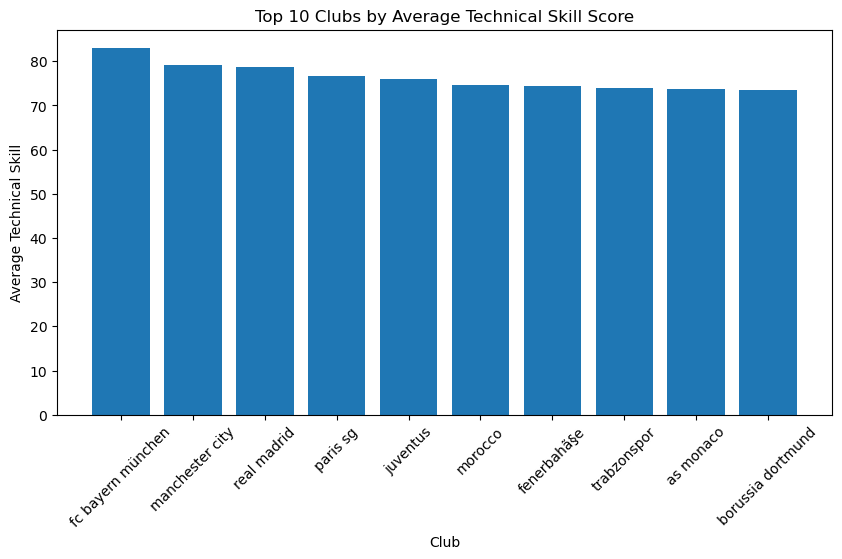

In [26]:
# 6.4 Extra Visualisation — Top 10 Clubs by Technical Skill

avg_tech_by_club = (
    df_cleaned.groupby('club')['technical_skill']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(avg_tech_by_club)

plt.figure(figsize=(10, 5))
plt.bar(avg_tech_by_club.index, avg_tech_by_club.values)
plt.title("Top 10 Clubs by Average Technical Skill Score")
plt.xlabel("Club")
plt.ylabel("Average Technical Skill")
plt.xticks(rotation=45)
plt.show()